# ANN_Regression_Car_Sales_Price_Prediction
##### -Mayank Srivastava
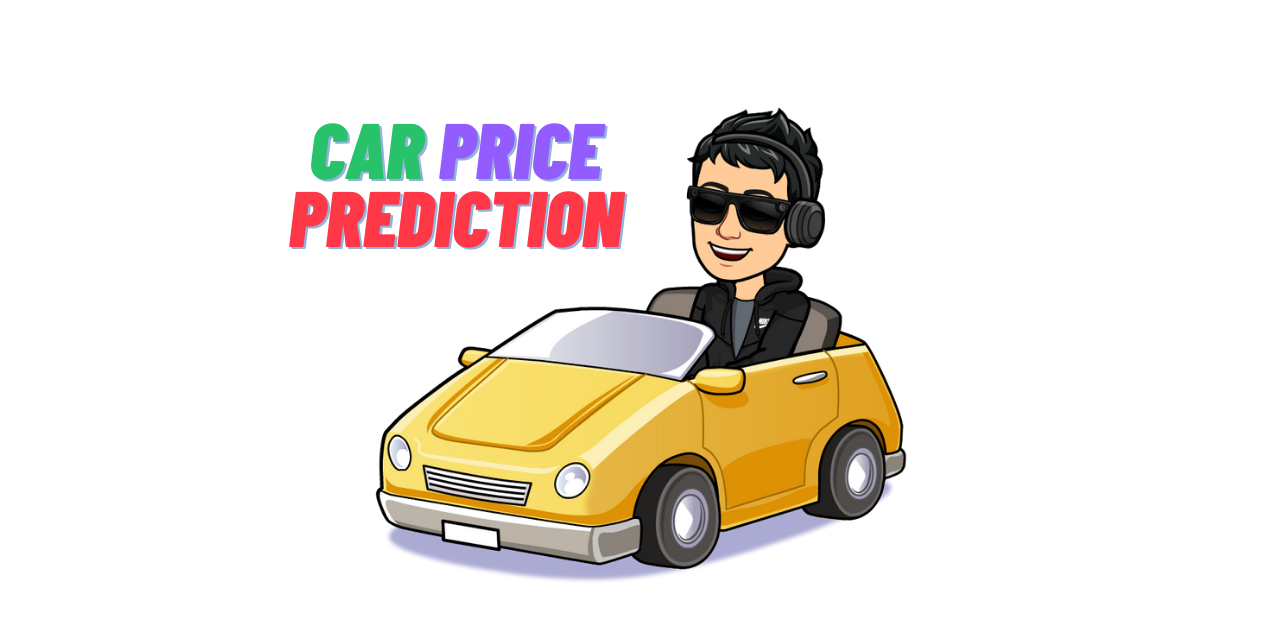

## Objective:

The objective of this assignment is to build and train
an Artificial Neural Network (ANN) model using the
Car Sales dataset. 

## Skills:

- data preprocessing,
- exploratory data analysis
- model architecture development, 
- training, and
- evaluation to predict car sales based on various features.

## Main Context:-
As a vehicle salesperson, its desired to create a model that can estimate the overall amount that consumers would spend given the following characteristics:

- customer name, 
- customer email, 
- country, 
- gender, 
- age, 
- annual salary, 
- credit card debt, and 
- net worth

### The model should anticipate the following (Problem Statement):
***Amount Paid for a Car***

## Task type:
Regression

***

## Tasks

### Data Pre-Processing

> #### Loading the dataset and importing the libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from keras.models import Sequential

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

### Note:
While reading csv you will face an error UnicodeDecodeError
Just do the following step while reading csv file:-


```pytthon
data = pd.read_csv("/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv",encoding='ISO-8859-1')
```

In [2]:
df= pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')
df.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


> #### Exploratory data analysis

In [3]:
# checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB



    - Observations:

        1. Dataset size is 500 rows x 9 columns
        2. NO null/ missing values in the dataset
`

In [4]:
# checking describe on the dataset
df.describe(include= 'all')

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
unique,498,500,211,NaN,NaN,NaN,NaN,NaN,NaN
top,Seth,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Israel,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,1,6,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,NaN,NaN,NaN,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,NaN,NaN,NaN,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,NaN,NaN,NaN,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,NaN,NaN,NaN,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,NaN,NaN,NaN,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517



Observations:
1. Dataset has customer base of 211 different countries
2. Gender column has int datatype and represents 0: Male and 1: Female
3. Age column varies from 20 to 70 yead, with avg age of 46.2 years
4. Avg Annual Salary is 62,127, avg debt is 9,607, avg net worth is 431,475 and avg car purchase amount is 44,209.
5. Assuming all values are in USD ($)


In [5]:
# count of male & feamle
df.gender.value_counts()

gender
1    253
0    247
Name: count, dtype: int64

```python
Male: 247, Female: 253
```

In [6]:
# Top 10 countires represented in the dataset (by respective customer count)
df.country.value_counts().head(10)

country
Israel              6
Mauritania          6
Bolivia             6
Greenland           5
Saint Barthélemy    5
Guinea              5
Iraq                5
Samoa               5
Liechtenstein       5
Bhutan              5
Name: count, dtype: int64

In [7]:
# customer name and customer e-mail are unique features, and can be dropped
# country and gender can also be dropped
df.drop(columns = ['customer name','customer e-mail','country','gender'], inplace= True)

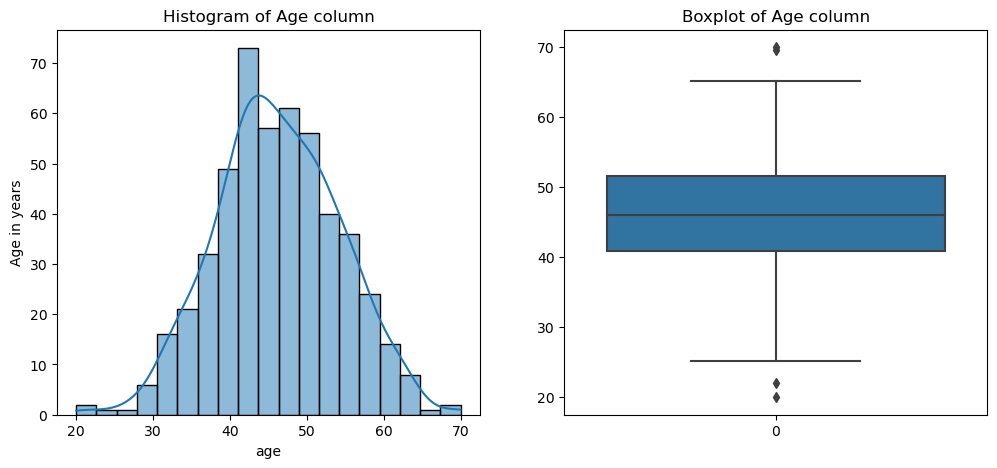

In [8]:
# age
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df.age, kde = True)
plt.title('Histogram of Age column')
plt.ylabel('Age in years')

plt.subplot(1,2,2)
sns.boxplot(df.age)
plt.title('Boxplot of Age column')
plt.show()

```python
Age column is approximately normally distributed and has outliers at both the ends
```

E:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


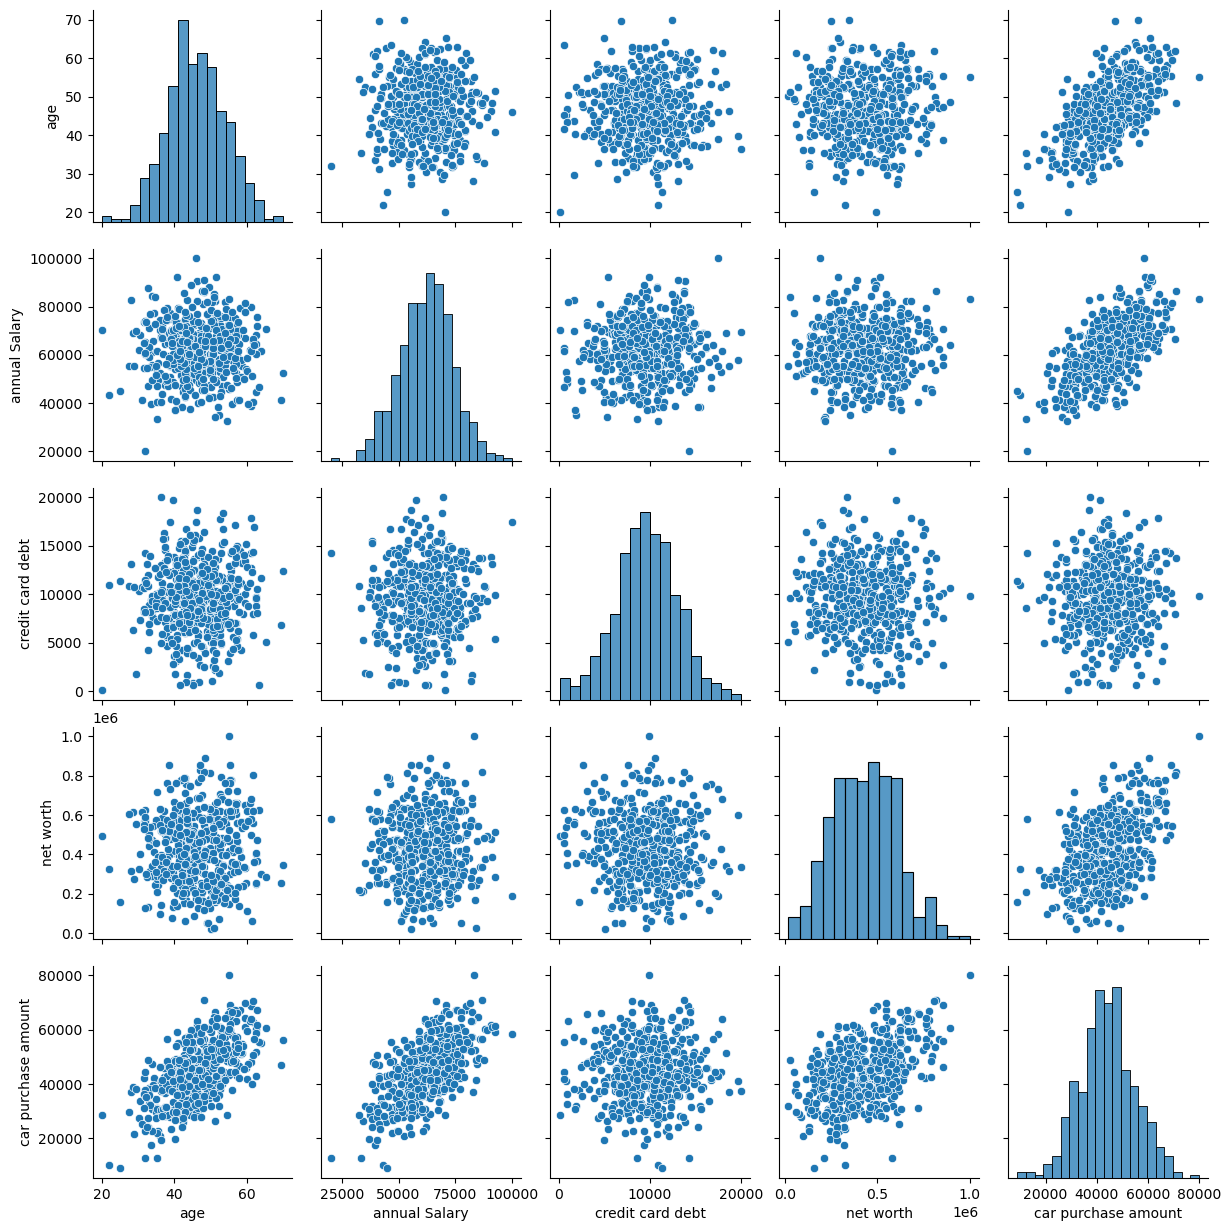

In [9]:
# Pairplot for Numerical columns

sns.pairplot(df)
plt.show()

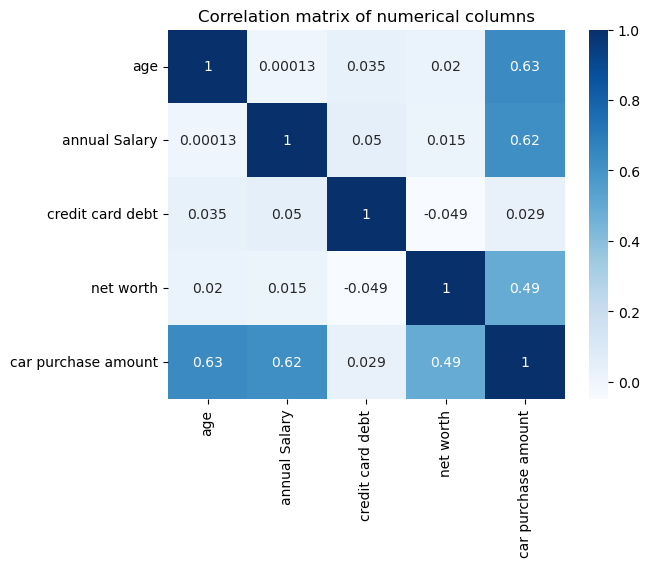

In [10]:
#correation matrix
corr= df.corr(numeric_only = True)
sns.heatmap(corr, annot = True, cmap="Blues")
plt.title('Correlation matrix of numerical columns')
plt.show()

``` python
Observations:
    
1. As per correlatin matrix, target col = Car purchase amount, has slightly positive relationship with Age,              Annual Salary and net-worth
```

> #### Encoding: LabelEncoder


    Observation:

    Since, all columns are numerical, there is no need for Encoding

In [11]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


> #### Splitting: Train & Test Data


In [12]:
x=df.drop('car purchase amount', axis =1)
y=df['car purchase amount']

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size =0.2, random_state =42)

In [14]:
#checking shapes of xtrain and xtest
xtrain.shape, xtest.shape

((400, 4), (100, 4))

> #### Scaling: StandardScaler


In [15]:
scaler =StandardScaler()
xtrain =scaler.fit_transform(xtrain)
xtest =scaler.transform(xtest)

In [16]:
xtrain, ytrain

(array([[-1.22996274,  0.70264523,  0.06782569,  1.14322143],
        [-0.76993543, -0.49583563, -0.85967664, -1.16188481],
        [ 1.58484034, -0.55624875,  1.05701072,  0.76354398],
        ...,
        [-0.08676592,  0.13289634, -1.67932755,  1.00304384],
        [ 1.48934693, -1.73041723, -0.39436898, -0.06165717],
        [-1.92977493,  0.53060764, -0.63911954, -0.15781448]]),
 249    46135.27233
 433    29519.56184
 19     54827.52403
 322    59625.02618
 332    25252.93221
           ...     
 106    34803.82395
 270    12536.93842
 348    49348.88394
 435    42139.64528
 102    33640.73697
 Name: car purchase amount, Length: 400, dtype: float64)

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [18]:
train_pred_lr = lr.predict(xtrain)
test_pred_lr =lr.predict(xtest)

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('Training metrics')
print('r2_score: ',r2_score(ytrain,train_pred_lr))
print('mean_absolute_error: ',mean_absolute_error(ytrain,train_pred_lr))
print('root_mean_squared_error: ',np.sqrt(mean_squared_error(ytrain,train_pred_lr)))
print("\n")
print('Testing metrics')
print('r2_score: ',r2_score(ytest,test_pred_lr))
print('mean_absolute_error: ',mean_absolute_error(ytest,test_pred_lr))
print('root_mean_squared_error: ',np.sqrt(mean_squared_error(ytest,test_pred_lr)))

Training metrics
r2_score:  0.9999999812450086
mean_absolute_error:  1.1786832998436239
root_mean_squared_error:  1.4841461164361365


Testing metrics
r2_score:  0.9999999808303804
mean_absolute_error:  1.150084345075993
root_mean_squared_error:  1.4386814760274969


In [20]:
# Lets make some predicitons from the model using our test set
xtest.shape

(100, 4)

In [21]:
# predicting sales for 3 random records from xtest
import random
x1=random.randint(0,99)
x2=random.randint(0,99)
x3=random.randint(0,99)
x1,x2,x3

(18, 91, 2)

In [22]:
print('Predicted value, True Value')
print(lr.predict([xtest[x1]])," , ",ytest.values[x1])
print(lr.predict([xtest[x2]])," , ",ytest.values[x2])
print(lr.predict([xtest[x3]])," , ",ytest.values[x3])

Predicted value, True Value
[60528.35785327]  ,  60526.97788
[37365.80638491]  ,  37364.23474
[63081.63339589]  ,  63079.84329


# Regression using ANN
### ANN_Model_Development

In [23]:
sc_y=StandardScaler()
ytrain_scaled=sc_y.fit_transform(ytrain.values.reshape(-1, 1))
ytest_scaled=sc_y.transform(ytest.values.reshape(-1, 1))

> #### ANN_Architecture

In [24]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=4))   # input layer no. of neurons = inut dimensions
model.add(Dense(64, activation='relu'))                 # hidden layer
model.add(Dense(1, activation='linear'))                # regression ouput layer

E:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


https://keras.io/api/losses/

https://keras.io/api/optimizers/

https://keras.io/api/metrics/


In [25]:
model.compile(optimizer ='adam', loss= "mse", metrics =["r2_score"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,961 (35.00 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 0 (0.00 B)

> #### ANN_Model_Training

In [26]:
history=model.fit(xtrain, ytrain_scaled, epochs=100, batch_size=32, validation_data=(xtest, ytest_scaled))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.7925 - r2_score: 0.1274 - val_loss: 0.2902 - val_r2_score: 0.6843
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1990 - r2_score: 0.7871 - val_loss: 0.0226 - val_r2_score: 0.9754
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0231 - r2_score: 0.9756 - val_loss: 0.0297 - val_r2_score: 0.9677
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - r2_score: 0.9783 - val_loss: 0.0072 - val_r2_score: 0.9922
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067 - r2_score: 0.9932 - val_loss: 0.0050 - val_r2_score: 0.9946
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - r2_score: 0.9953 - val_loss: 0.0039 - val_r2_score: 0.9958
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - r2_score: 0.9973 - val_loss: 0.0027 - val_r2_score: 0.9971
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - r2_score: 0.9979 - val_loss: 0.0019 - val_

Epoch 50/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2263e-05 - r2_score: 0.9999 - val_loss: 2.5950e-04 - val_r2_score: 0.9997
Epoch 51/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0845e-05 - r2_score: 0.9999 - val_loss: 2.5305e-04 - val_r2_score: 0.9997
Epoch 52/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6402e-05 - r2_score: 0.9999 - val_loss: 2.6509e-04 - val_r2_score: 0.9997
Epoch 53/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.0830e-05 - r2_score: 0.9999 - val_loss: 2.3170e-04 - val_r2_score: 0.9997
Epoch 54/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4678e-05 - r2_score: 0.9999 - val_loss: 2.6352e-04 - val_r2_score: 0.9997
Epoch 55/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.0656e-05 - r2_score: 0.9999 - val_loss: 2.2759e-04 - val_r2_score: 0.9998
Epoch 56/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.0841e-05 - r2_score: 0.9999 - val_loss: 2.1930e-04 - val_r2_score: 0.9998
Epoch 57/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2646e-05 - r2_score: 1.0000 - val_loss: 1.5632e-04 - val_r2_score: 0.9998
Epoch 99/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5743e-05 - r2_score: 1.0000 - val_loss: 1.5807e-04 - val_r2_score: 0.9998
Epoch 100/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6595e-05 - r2_score: 1.0000 - val_loss: 1.7087e-04 - val_r2_score: 0.9998


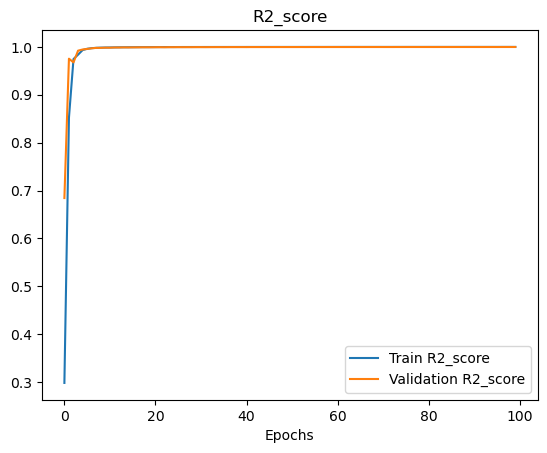

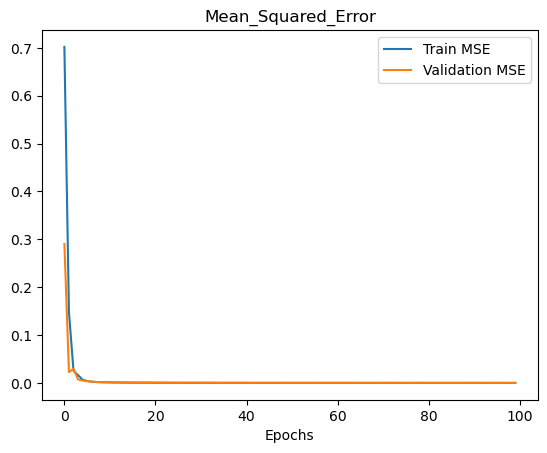

In [27]:
# Plot accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['r2_score'], label='Train R2_score')
plt.plot(history.history['val_r2_score'], label='Validation R2_score')
plt.legend()
plt.title('R2_score')
plt.xlabel("Epochs")
plt.show()

# Similar plot for loss
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.legend()
plt.title("Mean_Squared_Error")
plt.xlabel("Epochs")
plt.show()

### Model_Evaluation

#### Evaluate the Model on Train Data

In [28]:
loss, accuracy = model.evaluate(xtrain, ytrain_scaled)
loss= np.sqrt(loss)
print(f'Train loss (RMSE): {loss:.8f}')
print(f'Train R2_score: {accuracy:.8f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8115e-05 - r2_score: 1.0000 
Train loss (RMSE): 0.00538407
Train R2_score: 0.99997103


#### Evaluate the Model on Test Data

In [29]:
loss, accuracy = model.evaluate(xtest, ytest_scaled)
loss= np.sqrt(loss)
print(f'Test loss (RMSE): {loss:.8f}')
print(f'Test R2_score: {accuracy:.8f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8469e-04 - r2_score: 0.9998 
Test loss (RMSE): 0.01307175
Test R2_score: 0.99981415


### ANN_Model_Predictions

In [30]:
train_pred=model.predict(xtrain)
test_pred=model.predict(xtest)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

print('Training metrics')
print('r2_score: ',r2_score(ytrain_scaled,train_pred))
print('mean_absolute_error: ',mean_absolute_error(ytrain_scaled,train_pred))
print('root_mean_squared_error: ',np.sqrt(mean_squared_error(ytrain_scaled,train_pred)))
print("\n")
print('Testing metrics')
print('r2_score: ',r2_score(ytest_scaled,test_pred))
print('mean_absolute_error: ',mean_absolute_error(ytest_scaled,test_pred))
print('root_mean_squared_error: ',np.sqrt(mean_squared_error(ytest_scaled,test_pred)))

Training metrics
r2_score:  0.9999710118285393
mean_absolute_error:  0.004353657816639673
root_mean_squared_error:  0.005384066442816327


Testing metrics
r2_score:  0.9998141391065621
mean_absolute_error:  0.0099580186688057
root_mean_squared_error:  0.013071748712054968


**The Result of Comparison of Metrics from LinearRegression vs ANN models is as follows**

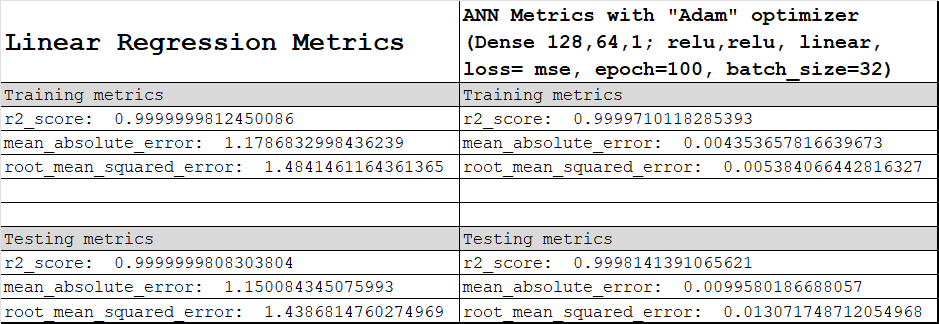

In [32]:
# Inverse transform the Scaled y-class
test_pred_inverse_scaled = sc_y.inverse_transform(test_pred)
test_origianl_inverse_scaled =sc_y.inverse_transform(ytest_scaled)

In [33]:
test_pred_inverse_scaled.flatten()

array([46301.94 , 45081.363, 62819.31 , 31407.738, 60650.36 , 63035.918,
       52843.62 , 54852.766, 52729.184, 48139.17 , 38149.965, 56417.293,
       44267.953, 38990.17 , 40175.65 , 54942.035, 48837.58 , 17505.602,
       60648.652, 50074.742, 41369.906, 52720.11 , 51741.387, 38078.61 ,
       41339.816, 38143.64 , 64157.727, 48101.9  , 22661.775, 52174.535,
       55265.953, 46006.94 , 40935.598, 57512.434, 42756.11 , 39949.684,
       61512.19 , 30691.66 , 42352.727, 40278.004, 57289.906, 60762.32 ,
       47718.94 , 36630.51 , 53517.234, 44499.527, 35197.043, 42264.37 ,
       51798.645, 47159.625, 41804.05 , 32870.65 , 38236.47 , 41844.18 ,
       45166.625, 47967.03 , 60189.58 , 44679.29 , 44439.49 , 38320.03 ,
       63963.996, 43414.242, 22543.998, 55216.293, 41527.23 , 54869.73 ,
       60042.137, 34244.875, 43018.71 , 47966.45 , 60333.277, 28829.725,
       59521.516, 55983.062, 59732.254, 22028.016, 41365.996, 49482.37 ,
       32887.582, 61464.97 , 42380.51 , 30448.46 , 

In [35]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.DataFrame({"True": ytest, "predicted_LR": test_pred_lr,"True_inv_scaled":test_origianl_inverse_scaled.flatten(),"Pred_ANN_inv_scaled":test_pred_inverse_scaled.flatten()})

,True,predicted_LR,True_inv_scaled,Pred_ANN_inv_scaled
361,46082.80993,46084.512762,46082.80993,46301.941406
73,45058.89690,45060.487047,45058.89690,45081.363281
374,63079.84329,63081.633396,63079.84329,62819.308594
155,31837.22537,31838.237987,31837.22537,31407.738281
104,60461.24268,60460.906486,60461.24268,60650.359375
394,63140.05082,63138.051326,63140.05082,63035.917969
377,52477.83479,52479.914562,52477.83479,52843.621094
124,54755.42038,54757.704680,54755.42038,54852.765625
68,52707.96816,52707.057176,52707.96816,52729.183594
450,47869.82593,47869.432488,47869.82593,48139.171875


## Model Fine-Tuning:

We have not tuned this model as a generalized model has been achieved already with:
- Training R2_score = 0.999971
- Testing R2_score = 0.999814

***